In [81]:
import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

dados = pd.read_csv(url)

In [82]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [83]:
dados.sample(10) #sampling 10 rows of data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9384,Rua das Verbenas,Vila Lúcia,São Paulo,160,4,4,2,R$ 1.200.000
9556,NaN,Jardim América,São Paulo,755,2,2,7,R$ 14.900.000
8641,NaN,Consolação,São Paulo,855,9,8,25,R$ 28.000\n /Mês
1648,NaN,Vila São Francisco,São Paulo,350,4,4,4,R$ 1.300.000
7971,Rua Doutor Wladimir do Amaral,Jardim Peri Peri,São Paulo,240,3,5,6,R$ 1.100.000
777,NaN,Vila Cláudia,São Paulo,205,3,5,3,R$ 1.485.000
9154,NaN,Vila da Saúde,São Paulo,250,3,2,5,R$ 1.100.000
7605,"Rua André Rebouças, 0",Vila Piauí,São Paulo,75,2,2,1,R$ 400.000
6890,Rua Girassol,Pinheiros,São Paulo,180,3,3,2,R$ 3.000.000
545,"Rua dos Americanos, 687",Barra Funda,São Paulo,150,3,2,1,R$ 840.000


In [84]:
dados['Bairro'][6522]

'Vila Paulo Silas'

In [85]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [86]:
dados['Metragem'].mean()

442.30065947242207

### Calculando a média da metragem das casas do bairro Vila Mariana

In [87]:
imoveis_vila_mariana = dados[dados['Bairro']=='Vila Mariana']
imoveis_vila_mariana.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


In [88]:
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

In [89]:
n_imoveis_bairro = dados['Bairro'].value_counts()
n_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

<AxesSubplot:>

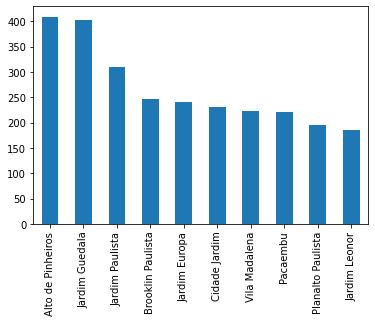

In [90]:
n_imoveis_bairro.head(10).plot.bar()

## Calcule a média da metragem por bairro

In [91]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [92]:
metragem_por_bairro = pd.DataFrame(dados.groupby('Bairro')['Metragem'].mean())
metragem_por_bairro

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


In [93]:
metragem_por_bairro.describe()

,Metragem
count,701.000000
mean,285.448322
std,1403.268009
min,10.000000
25%,135.444444
50%,184.454545
75%,265.500000
max,37000.000000


## Agora iremos tratar os dados

In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [95]:
dados['Valor'][0] #Devemos converter a coluna valor para float

'R$ 7.000.000'

In [96]:
dados['Valor'][0].split() #O método split separa a string

['R$', '7.000.000']

In [97]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4354,Rua Southey,Vila Dom Pedro I,São Paulo,248,4,3,5,R$ 1.180.000
2878,Rua das Promessas,Vila Medeiros,São Paulo,113,3,2,3,R$ 405.000
4084,NaN,Aclimação,São Paulo,180,3,3,4,R$ 2.200.000
2326,Rua Líbero Ripole,Jardim Umuarama,São Paulo,250,3,1,1,R$ 950.000
4509,Avenida Professor Fonseca Rodrigues,Alto de Pinheiros,São Paulo,478,4,6,4,R$ 7.243.185
6243,Rua Mesquita,Vila Deodoro,São Paulo,260,3,3,3,R$ 1.800.000
3217,"Rua Antônio Ambuba, 32",Parque Munhoz,São Paulo,124,3,2,2,R$ 690.000
8077,NaN,Jardim Luzitânia,São Paulo,632,3,5,4,R$ 13.000.000
3940,Rua Camundo,Planalto Paulista,São Paulo,170,3,2,2,R$ 785.000
6232,NaN,Jardim Guedala,São Paulo,577,4,6,7,R$ 15.000\n /Mês


Observe que na linha 6510 o valor contém mais erro. Somente o método split anterior não será suficiente para consertar isto.

In [98]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [99]:
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [100]:
dados['Valor'].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [101]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [102]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


Vamos eliminar os anúncios que referem-se a aluguéis

In [103]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [104]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]

In [105]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [110]:
dados_vendas['Valor_anuncio'].str.replace('.','').astype(float) #Primeiramente devemos eliminar os pontos dos números. O python apenas aceita um ponto que representa o decimal. Aqui também temos pontos na casa de milhar.

/tmp/ipykernel_3104/595629349.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio'].str.replace('.','').astype(float) #Primeiramente devemos eliminar os pontos dos números. O python apenas aceita um ponto que representa o decimal. Aqui também temos pontos na casa de milhar.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [111]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)

/tmp/ipykernel_3104/251354584.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)
/tmp/ipykernel_3104/251354584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)


In [113]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


<AxesSubplot:ylabel='Frequency'>

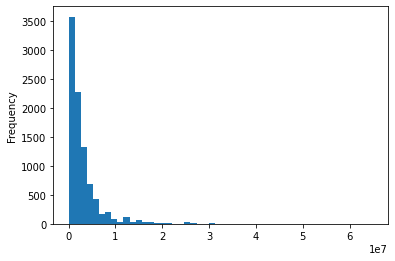

In [118]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 50)

In [119]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [120]:
pd.set_option('display.precision', 2) #diminui o número de casas decimais do display
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9.16e+03
mean,434.42,3.45,3.80,3.96,3.05e+06
std,7856.42,1.05,1.97,2.60,3.94e+06
min,10.00,1.00,1.00,1.00,1.30e+04
25%,168.00,3.00,2.00,2.00,8.90e+05
50%,276.00,3.00,4.00,4.00,1.80e+06
75%,450.00,4.00,5.00,5.00,3.50e+06
max,750000.00,16.00,40.00,50.00,6.50e+07


In [124]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Converte valores científicos em numéricos.
dados_vendas.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [128]:
dados_vendas[['Rua', 'Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


In [126]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


## Plotando alguns gráficos

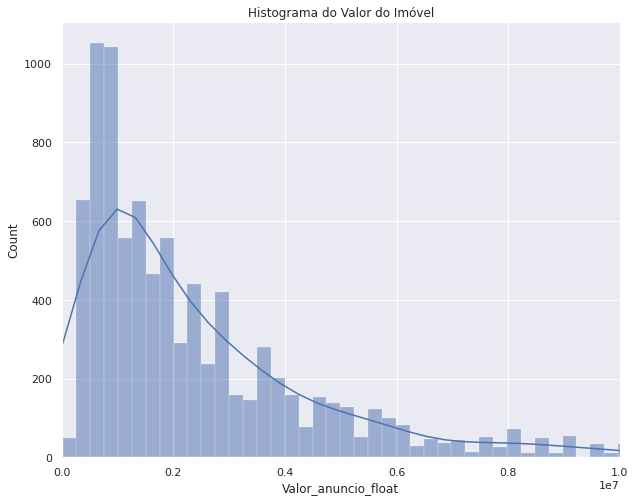

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize = (10, 8))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', kde = True)
ax.set_title('Histograma do Valor do Imóvel')
plt.xlim((-50, 10000000))

plt.show()